In [ ]:
!pip install pyspark # Install the PySpark module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark as ps # Now you can import PySpark
import json

In [ ]:
# prompt: connect dataset from mydrive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_file_path' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/social_media/socialmediainfluence.csv'

# Read the data into a Pandas DataFrame, specifying the encoding
df = pd.read_csv(file_path, encoding='latin-1') # Try 'latin-1' encoding. If it still fails, experiment with other encodings like 'iso-8859-1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: list of column names

list(df.columns)


['Consumer ID',
 'Customer Name',
 'Age',
 'Gender',
 'Income (USD)',
 'Education Level',
 'Social Media Usage (Hours/Day)',
 'Social Media Platforms',
 'Influence Level',
 'Purchase Decision',
 'Product Category',
 'Specific Product',
 'Amount Spent (USD)',
 'Brand Name',
 'City']

<ipython-input-34-6feef6111d9c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Social Media Platforms', y='Count', hue='Influence Level', data=grouped_data, ci=None)


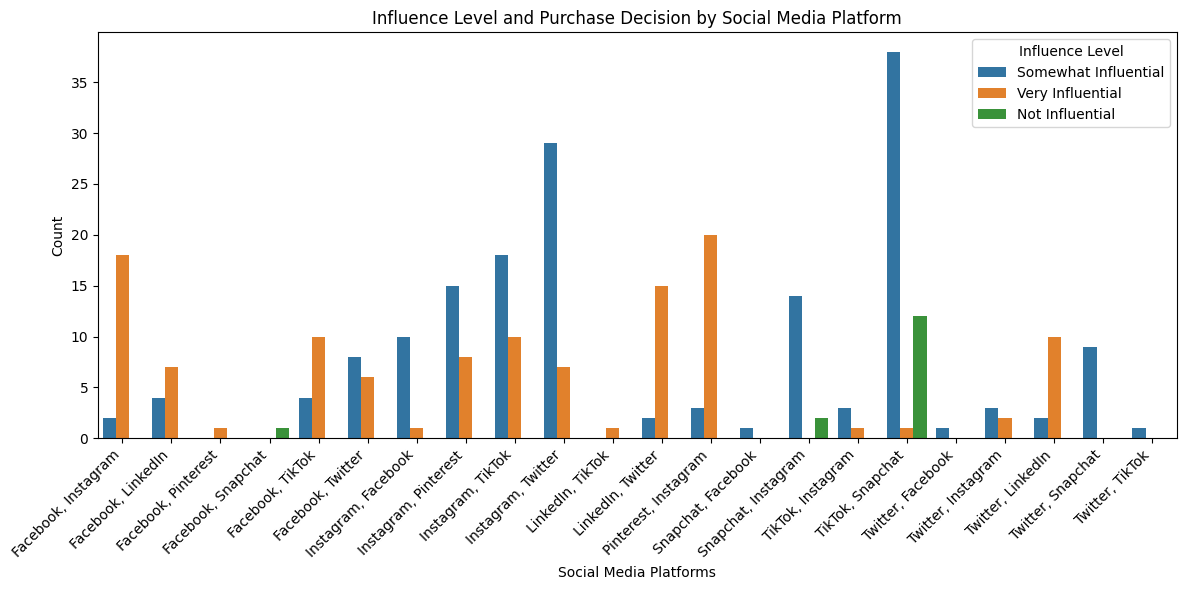

In [ ]:
# prompt: bar chart of social media platform, influence level and purchase decision

import matplotlib.pyplot as plt
# Group the data and calculate the counts
grouped_data = df.groupby(['Social Media Platforms', 'Influence Level', 'Purchase Decision']).size().reset_index(name='Count')

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Social Media Platforms', y='Count', hue='Influence Level', data=grouped_data, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Influence Level and Purchase Decision by Social Media Platform')
plt.xlabel('Social Media Platforms')
plt.ylabel('Count')
plt.legend(title='Influence Level')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: separate the social media platforms with the comma and generate a list of them

# Extract the 'Social Media Platforms' column and split the values by comma
platforms_string = df['Social Media Platforms'].str.cat(sep=',')
platforms_list = platforms_string.split(',')

# Remove any leading/trailing whitespace and create a unique list
platforms_list = [platform.strip() for platform in platforms_list]
unique_platforms = list(set(platforms_list))

print(unique_platforms)


['Snapchat', 'Pinterest', 'LinkedIn', 'Twitter', 'Facebook', 'Instagram', 'TikTok']


<ipython-input-37-f141ec36da20>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Count', hue='Influence Level', data=all_platform_counts, ci=None)


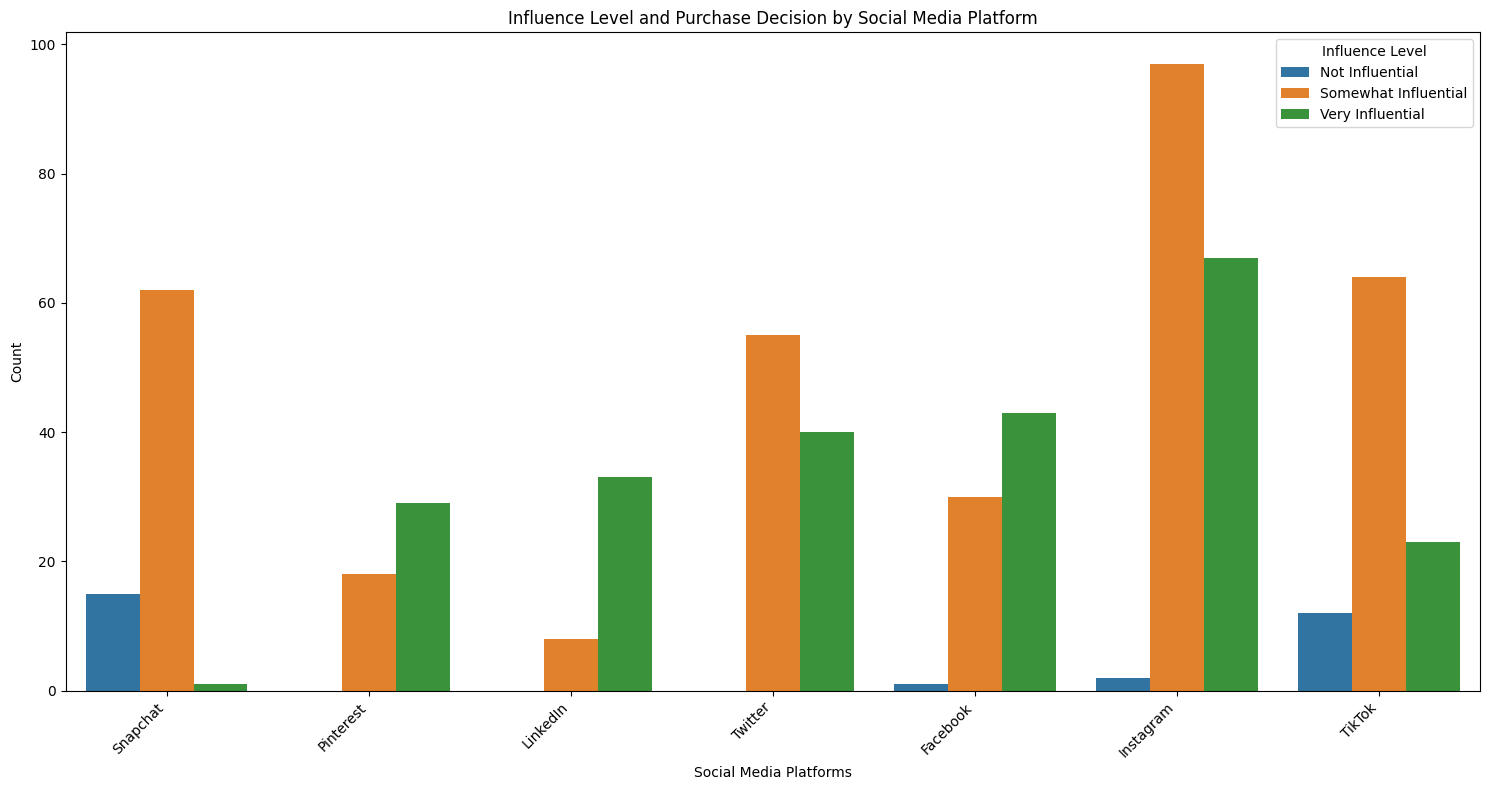

In [ ]:
# prompt: based on that list of platforms, generate a bar chart of social media platforms, influence level and purchase decision

import pandas as pd
import matplotlib.pyplot as plt
# Group the data and calculate the counts for each platform
platform_counts = []
for platform in unique_platforms:
  platform_data = df[df['Social Media Platforms'].str.contains(platform, na=False)]
  grouped_data = platform_data.groupby(['Influence Level', 'Purchase Decision']).size().reset_index(name='Count')
  grouped_data['Platform'] = platform  # Add a 'Platform' column
  platform_counts.append(grouped_data)

# Concatenate the data for all platforms
all_platform_counts = pd.concat(platform_counts)

# Create a bar chart using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Count', hue='Influence Level', data=all_platform_counts, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Influence Level and Purchase Decision by Social Media Platform')
plt.xlabel('Social Media Platforms')
plt.ylabel('Count')
plt.legend(title='Influence Level')
plt.tight_layout()
plt.show()


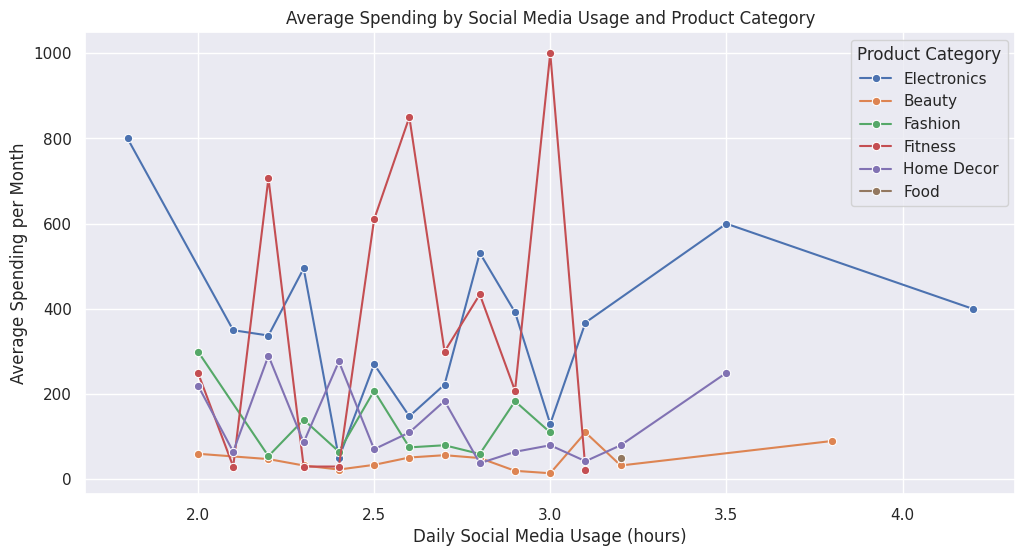

In [ ]:
# prompt: How does the duration of social media usage per day influence consumer spending across different product categories?

import matplotlib.pyplot as plt
# Group the data by 'Daily Social Media Usage (hours)' and 'Product Category' and calculate the average spending
spending_by_usage = df.groupby(['Social Media Usage (Hours/Day)', 'Product Category'])['Amount Spent (USD)'].mean().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Social Media Usage (Hours/Day)', y='Amount Spent (USD)', hue='Product Category', data=spending_by_usage, marker='o')
plt.title('Average Spending by Social Media Usage and Product Category')
plt.xlabel('Daily Social Media Usage (hours)')
plt.ylabel('Average Spending per Month')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()
